In [27]:
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
import seaborn as sns
import lux




In [28]:

pd.set_option('display.max_columns', 20)


df = pd.read_csv('Full_Data_with_SentimentScore.csv', date_parser = True)

df = df.set_index('Date', drop = True)


# Create short simple moving average over the short window
df['short_mavg'] = df['Close'].rolling(window=5, min_periods=1, center=False).mean()

# Create long simple moving average over the long window
df['long_mavg'] = df['Close'].rolling(window=30, min_periods=1, center=False).mean()

# Create signals
df['signal'] = np.where(df['short_mavg'] > df['long_mavg'], 1.0, 0.0)

df

Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

<AxesSubplot:title={'center':'Correlation Matrix'}>

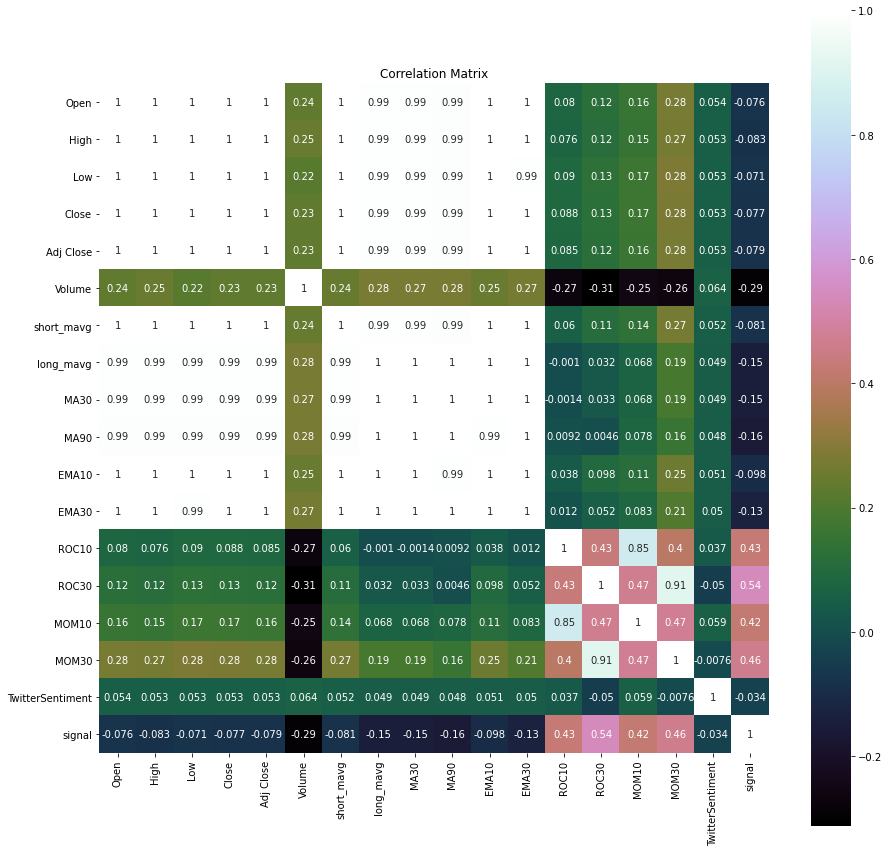

In [25]:
# correlation
correlation = df.corr()
plt.figure(figsize=(15,15))
plt.title('Correlation Matrix')
sns.heatmap(correlation, vmax=1, square=True,annot=True,cmap='cubehelix')

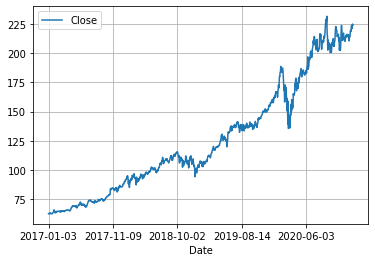

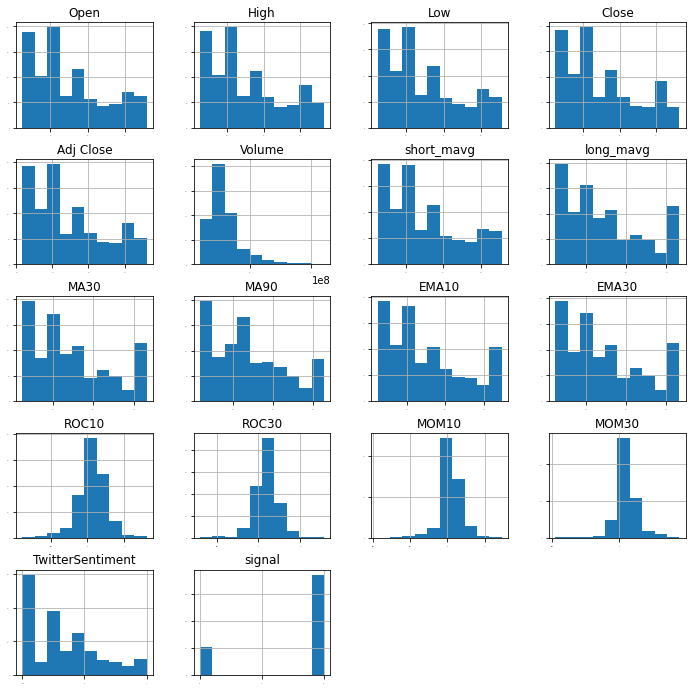

In [26]:
df[['Close']].plot(grid=True)
plt.show()

# histograms
df.hist(sharex=False, sharey=False, xlabelsize=1, ylabelsize=1, figsize=(12,12))
plt.show()